In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import math
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
data=pd.read_excel("D:/data/0280/0280.xlsx")
data

,序号,设备状态,数据类型,定位时间,设备名称,设备编码,经度,纬度,获取位置,警报状态,事件,电量,定位方式,方向,海拔高度,速度
0,1,"锁杆开,无充电,解封,静止,短连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-07-29 10:02:28,489076140280,489076140280,113.797464,22.688276,获取定位,外壳破坏报警,NaN,68%,GPS有效定位,326,74,0.0
1,2,"锁杆开,无充电,解封,静止,短连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-07-29 10:02:58,489076140280,489076140280,113.797464,22.688276,获取定位,外壳破坏报警,NaN,68%,GPS有效定位,326,74,0.0
2,3,"锁杆开,无充电,解封,静止,短连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-07-29 10:03:28,489076140280,489076140280,113.797464,22.688276,获取定位,外壳破坏报警,NaN,68%,GPS有效定位,326,74,0.0
3,4,"锁杆开,无充电,解封,静止,短连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-07-29 10:03:58,489076140280,489076140280,113.797464,22.688276,获取定位,外壳破坏报警,NaN,68%,GPS有效定位,326,74,0.0
4,5,"锁杆开,无充电,解封,静止,短连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-07-29 10:04:28,489076140280,489076140280,113.797464,22.688276,获取定位,外壳破坏报警,NaN,68%,GPS有效定位,326,74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8848,8849,"锁杆开,无充电,解封,静止,长连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-08-01 15:28:50,489076140280,489076140280,113.943112,22.688810,获取定位,NaN,NaN,64%,GPS有效定位,252,69,0.0
8849,8850,"锁杆开,无充电,解封,静止,长连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-08-01 15:29:20,489076140280,489076140280,113.943112,22.688810,获取定位,NaN,NaN,63%,GPS有效定位,252,69,0.0
8850,8851,"锁杆开,无充电,解封,静止,长连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-08-01 15:29:50,489076140280,489076140280,113.943112,22.688810,获取定位,NaN,NaN,63%,GPS有效定位,252,69,0.0
8851,8852,"锁杆开,无充电,解封,静止,长连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-08-01 15:30:20,489076140280,489076140280,113.943112,22.688810,获取定位,NaN,NaN,63%,GPS有效定位,252,69,0.0


In [5]:
# 删除'A'列中值为0的行  
data = data[data['定位方式'] != 'LBS']
data
# 重置索引列
data = data.reset_index(drop=True)
data

,序号,设备状态,数据类型,定位时间,设备名称,设备编码,经度,纬度,获取位置,警报状态,事件,电量,定位方式,方向,海拔高度,速度
0,1,"锁杆开,无充电,解封,静止,短连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-07-29 10:02:28,489076140280,489076140280,113.797464,22.688276,获取定位,外壳破坏报警,NaN,68%,GPS有效定位,326,74,0.0
1,2,"锁杆开,无充电,解封,静止,短连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-07-29 10:02:58,489076140280,489076140280,113.797464,22.688276,获取定位,外壳破坏报警,NaN,68%,GPS有效定位,326,74,0.0
2,3,"锁杆开,无充电,解封,静止,短连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-07-29 10:03:28,489076140280,489076140280,113.797464,22.688276,获取定位,外壳破坏报警,NaN,68%,GPS有效定位,326,74,0.0
3,4,"锁杆开,无充电,解封,静止,短连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-07-29 10:03:58,489076140280,489076140280,113.797464,22.688276,获取定位,外壳破坏报警,NaN,68%,GPS有效定位,326,74,0.0
4,5,"锁杆开,无充电,解封,静止,短连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-07-29 10:04:28,489076140280,489076140280,113.797464,22.688276,获取定位,外壳破坏报警,NaN,68%,GPS有效定位,326,74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8576,8849,"锁杆开,无充电,解封,静止,长连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-08-01 15:28:50,489076140280,489076140280,113.943112,22.688810,获取定位,NaN,NaN,64%,GPS有效定位,252,69,0.0
8577,8850,"锁杆开,无充电,解封,静止,长连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-08-01 15:29:20,489076140280,489076140280,113.943112,22.688810,获取定位,NaN,NaN,63%,GPS有效定位,252,69,0.0
8578,8851,"锁杆开,无充电,解封,静止,长连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-08-01 15:29:50,489076140280,489076140280,113.943112,22.688810,获取定位,NaN,NaN,63%,GPS有效定位,252,69,0.0
8579,8852,"锁杆开,无充电,解封,静止,长连接,东经,北纬,网络状态缺省,关闭,卡1,GPS有效定位",实时数据,2024-08-01 15:30:20,489076140280,489076140280,113.943112,22.688810,获取定位,NaN,NaN,63%,GPS有效定位,252,69,0.0


In [6]:
data_features=data[['定位时间','经度','纬度','方向']]
# data_features=data_features.set_index('定位时间',inplace=False)
data_features

,定位时间,经度,纬度,方向
0,2024-07-29 10:02:28,113.797464,22.688276,326
1,2024-07-29 10:02:58,113.797464,22.688276,326
2,2024-07-29 10:03:28,113.797464,22.688276,326
3,2024-07-29 10:03:58,113.797464,22.688276,326
4,2024-07-29 10:04:28,113.797464,22.688276,326
...,...,...,...,...
8576,2024-08-01 15:28:50,113.943112,22.688810,252
8577,2024-08-01 15:29:20,113.943112,22.688810,252
8578,2024-08-01 15:29:50,113.943112,22.688810,252
8579,2024-08-01 15:30:20,113.943112,22.688810,252


In [7]:
# 删除'A'列中值为0的行  
data_features = data_features[data_features['经度'] != 0]
data_features
# 重置索引列
data_features = data_features.reset_index(drop=True)
data_features

,定位时间,经度,纬度,方向
0,2024-07-29 10:02:28,113.797464,22.688276,326
1,2024-07-29 10:02:58,113.797464,22.688276,326
2,2024-07-29 10:03:28,113.797464,22.688276,326
3,2024-07-29 10:03:58,113.797464,22.688276,326
4,2024-07-29 10:04:28,113.797464,22.688276,326
...,...,...,...,...
8554,2024-08-01 15:28:50,113.943112,22.688810,252
8555,2024-08-01 15:29:20,113.943112,22.688810,252
8556,2024-08-01 15:29:50,113.943112,22.688810,252
8557,2024-08-01 15:30:20,113.943112,22.688810,252


In [8]:
data_features_1=data_features.copy()
data_features_2=data_features.copy()
data_features_3=data_features.copy()

In [9]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8559 entries, 0 to 8558
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   定位时间    8559 non-null   object 
 1   经度      8559 non-null   float64
 2   纬度      8559 non-null   float64
 3   方向      8559 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 267.6+ KB


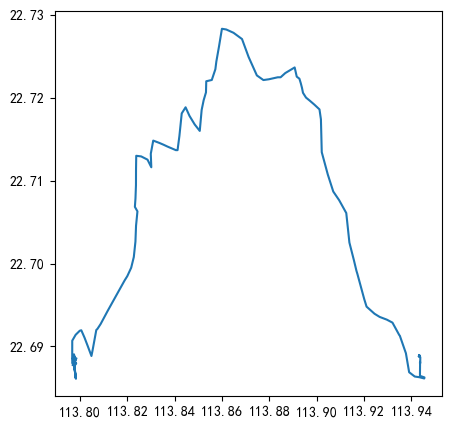

In [10]:
x= data_features[['经度']]
y =data_features[['纬度']]
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(x, y)
plt.show()

# 中值滤波

In [53]:
# 中值滤波
long=len(data_features)


step=2
star_index=2
end_index=long-step
for i in range(star_index,end_index):
    a=data_features.iloc[i-step:i+step+1].sort_values(by='经度')
    data_features.at[i, '经度']=a.iloc[step][1]
    b=data_features.iloc[i-step:i+step+1].sort_values(by='纬度')
    data_features.at[i, '纬度']=b.iloc[step][2]

data_features

,定位时间,经度,纬度,方向
0,2024-07-29 10:02:28,113.797464,22.688276,326
1,2024-07-29 10:02:58,113.797464,22.688276,326
2,2024-07-29 10:03:28,113.797464,22.688276,326
3,2024-07-29 10:03:58,113.797464,22.688276,326
4,2024-07-29 10:04:28,113.797464,22.688276,326
...,...,...,...,...
8554,2024-08-01 15:28:50,113.943112,22.688810,252
8555,2024-08-01 15:29:20,113.943112,22.688810,252
8556,2024-08-01 15:29:50,113.943112,22.688810,252
8557,2024-08-01 15:30:20,113.943112,22.688810,252


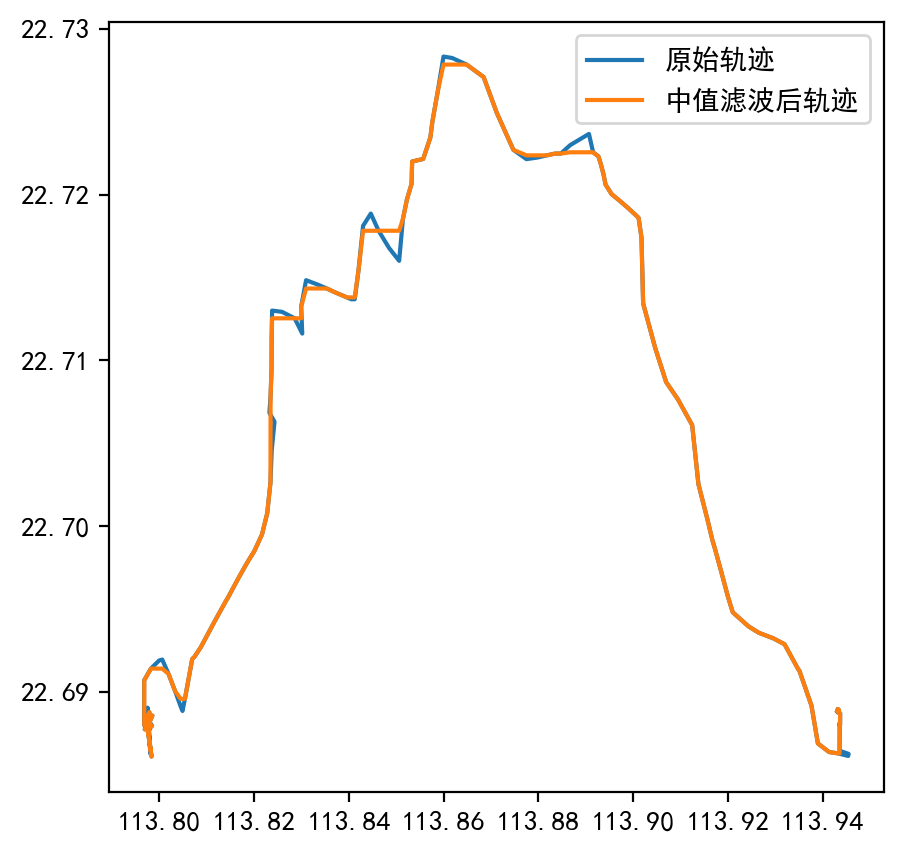

In [54]:
x= data_features[['经度']]
y =data_features[['纬度']]
plt.figure(figsize=(5, 5), dpi=200)
plt.plot(data_features_1['经度'], data_features_1['纬度'],label = '原始轨迹')
plt.plot(x, y,label='中值滤波后轨迹')
plt.legend()
plt.show()

In [55]:
# 保存数据
# data_features.to_excel("D:/data/0280zhongzhi.xlsx",index=True,header=True)

# 卡尔曼滤波

In [56]:
# 卡尔曼滤波
class KalmanFilter:  
    def __init__(self, process_variance, measurement_variance,x,y): #构造方法
        self.x = np.array([[x], [y]])  # 初始状态：经度和纬度  
        self.P = np.eye(2) * 1.0  # 初始协方差矩阵  
        self.A = np.eye(2)  # 状态转移矩阵  
        self.Q = np.eye(2) * process_variance  # 过程噪声协方差矩阵  
        self.H = np.eye(2)  # 观测矩阵  
        self.R = np.eye(2) * measurement_variance  # 测量噪声协方差矩阵  
  
    def update(self, z):  
        # 预测  
        x_pred = np.dot(self.A, self.x)  
        P_pred = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q  #self.A.T为self.A的转置矩阵   （（A*P）*A-1）+Q
  
        # 更新  
        S = np.dot(np.dot(self.H, P_pred), self.H.T) + self.R  
        K = np.dot(np.dot(P_pred, self.H.T), np.linalg.inv(S))  #np.linalg.inv(S)计算S矩阵的逆矩阵
        self.x = x_pred + np.dot(K, (z - np.dot(self.H, x_pred))) #更新经纬度的坐标，为下一次预测的初始状态
        self.P = np.dot((np.eye(len(self.x)) - np.dot(K, self.H)), P_pred) #更新协方差矩阵
  
    def get_state(self):  
        return self.x  

In [57]:
# 使用卡尔曼滤波器 
kf = KalmanFilter(process_variance=0.01, measurement_variance=0.01,x=data_features_1['经度'][0],y=data_features_1['纬度'][0])  

# 假设这是不准确的经纬度观测值  
measurements = []  
for index, row in data_features_1.iterrows():  
    # 提取经度和纬度，并创建NumPy数组  
    measurement = np.array([[row['经度']], [row['纬度']]])  
    # 将NumPy数组添加到measurements列表中  
    measurements.append(measurement)

estimated_coords = []

# 对每个观测值进行更新  
for z in measurements:  
    kf.update(z)
    x = kf.get_state()[0, 0]  # 注意这里使用了numpy的索引方式，假设get_state()返回的是numpy数组  
    y = kf.get_state()[1, 0]
    estimated_coords.append({'经度': x, '纬度': y})   # 将估计的(x, y)坐标添加到列表中
data_features_1[['经度','纬度']]=pd.DataFrame(estimated_coords)
data_features_1



# #可以结合两种算法（中值滤波+卡尔曼滤波器）中值滤波将异常数据滤除，卡尔曼滤波将数据变平滑
# kf = KalmanFilter(process_variance=0.01, measurement_variance=0.1,x=data_features['经度'][0],y=data_features['纬度'][0])  

# # 假设这是不准确的经纬度观测值  
# measurements = []  
# for index, row in data_features.iterrows():  
#     # 提取经度和纬度，并创建NumPy数组  
#     measurement = np.array([[row['经度']], [row['纬度']]])  
#     # 将NumPy数组添加到measurements列表中  
#     measurements.append(measurement)

# estimated_coords = []

# # 对每个观测值进行更新  
# for z in measurements:  
#     kf.update(z)
#     x = kf.get_state()[0, 0]  # 注意这里使用了numpy的索引方式，假设get_state()返回的是numpy数组  
#     y = kf.get_state()[1, 0]
#     estimated_coords.append({'经度': x, '纬度': y})   # 将估计的(x, y)坐标添加到列表中
# data_features[['经度','纬度']]=pd.DataFrame(estimated_coords)
# data_features

,定位时间,经度,纬度,方向
0,2024-07-29 10:02:28,113.797464,22.688276,326
1,2024-07-29 10:02:58,113.797464,22.688276,326
2,2024-07-29 10:03:28,113.797464,22.688276,326
3,2024-07-29 10:03:58,113.797464,22.688276,326
4,2024-07-29 10:04:28,113.797464,22.688276,326
...,...,...,...,...
8554,2024-08-01 15:28:50,113.943112,22.688810,252
8555,2024-08-01 15:29:20,113.943112,22.688810,252
8556,2024-08-01 15:29:50,113.943112,22.688810,252
8557,2024-08-01 15:30:20,113.943112,22.688810,252


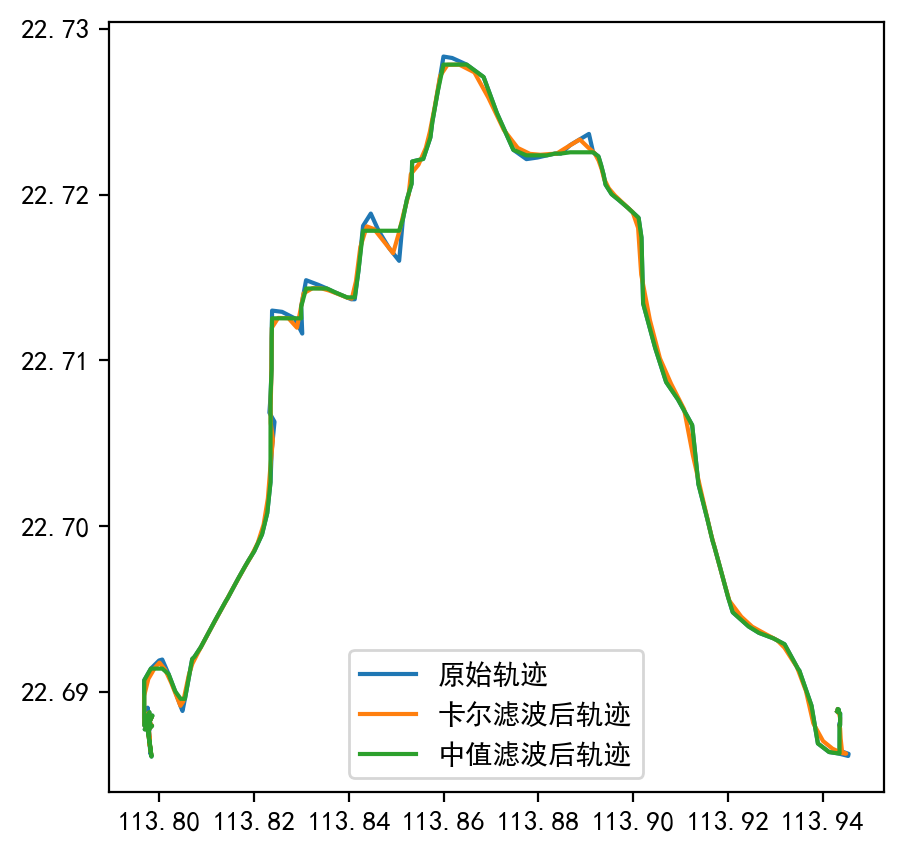

In [58]:
x= data_features_1[['经度']]
y =data_features_1[['纬度']]
j= data_features[['经度']]
k =data_features[['纬度']]
plt.figure(figsize=(5, 5), dpi=200)
plt.plot(data_features_2['经度'], data_features_2['纬度'],label = '原始轨迹')
plt.plot(x, y,label='卡尔滤波后轨迹')
plt.plot(j, k,label='中值滤波后轨迹')
plt.legend()
plt.show()

# #两算法结合的结果
# # x= data_features_1[['经度']]
# # y =data_features_1[['纬度']]
# j= data_features[['经度']]
# k =data_features[['纬度']]
# plt.figure(figsize=(5, 5), dpi=200)
# plt.plot(data_features_2['经度'], data_features_2['纬度'],label = '原始轨迹')
# # plt.plot(x, y,label='卡尔滤波后轨迹')
# plt.plot(j, k,label='中值滤波后轨迹')
# plt.legend()
# plt.show()

In [59]:
# 保存数据
# data_features_1.to_excel("D:/data/0280kaer.xlsx",index=True,header=True)

In [60]:
# # 初始化KalmanFilter 
# kf = KalmanFilter(process_variance=0.01, measurement_variance=0.1)  

# measurements = []  
# for index, row in df.iterrows():  
#     # 提取经度和纬度，并创建NumPy数组  
#     measurement = np.array([[row['x']], [row['y']]])  
#     # 将NumPy数组添加到measurements列表中  
#     measurements.append(measurement)  
    
# estimated_points = []
  
# # 对每个观测值进行更新  
# for z in measurements:  
#     kf.update(z)
#     x = kf.get_state()[0, 0]  # 注意这里使用了numpy的索引方式，假设get_state()返回的是numpy数组  
#     y = kf.get_state()[1, 0]  
#     estimated_points.append((x, y))  # 将估计的(x, y)坐标添加到列表中
    
    
# plt.figure(figsize=(10, 5))  # 可选：设置图形的大小  
# x_coords, y_coords = zip(*estimated_points)  # 解包列表以获取x和y坐标的元组  
# plt.plot(x_coords, y_coords, 'ro-')  # 使用红色圆圈和线连接点  
# plt.xlabel('X')  # 设置x轴标签  
# plt.ylabel('Y')  # 设置y轴标签  
# plt.title('Estimated Points Over Time')  # 设置图形标题  
# plt.grid(True)  # 显示网格  
# plt.show()  # 显示图形
# #     print(kf.get_state())

In [61]:
# data_features['定位时间']=pd.to_datetime(data_features['定位时间'])

In [62]:
# data_features.info()

In [63]:
# data_features

In [64]:
# x= data_features[['定位时间']]
# y =data_features[['经度']]
# plt.figure(figsize=(5, 5), dpi=200)
# # plt.plot(data_features_2['经度'], data_features_2['纬度'],label = '原始轨迹')
# plt.plot(x, y,'ro',label='卡尔滤波后轨迹')
# plt.legend()
# plt.show()

In [65]:
# x= data_features[['定位时间']]
# y =data_features[['纬度']]
# plt.figure(figsize=(5, 5), dpi=200)
# # plt.plot(data_features_2['经度'], data_features_2['纬度'],label = '原始轨迹')
# plt.plot(x, y,'ro',label='卡尔滤波后轨迹')
# plt.legend()
# plt.show()

In [66]:
# data_features_2['经度']=Denoising_wavelet(data_features_2['经度'])
# data_features_2['纬度']=Denoising_wavelet(data_features_2['纬度'])

In [67]:
# x= data_features_2[['经度']]
# y =data_features_2[['纬度']]
# plt.figure(figsize=(5, 5), dpi=200)
# plt.plot(data_features_3['经度'], data_features_3['纬度'],label = '原始轨迹')
# plt.plot(x, y,label='小波去噪后轨迹')
# # plt.plot(j, k,label='中值滤波后轨迹')
# plt.legend()
# plt.show()

# 采用DBSCAN对时间和距离聚类

In [68]:
#两坐标点的距离
import math

R = 6371.393
Pi = math.pi

# A地
jingduA, weiduA= 110.78927, 32.68965
xA = math.cos(math.radians(weiduA))*math.cos(math.radians(jingduA))
yA = math.cos(math.radians(weiduA))*math.sin(math.radians(jingduA))
zA = math.sin(math.radians(weiduA))

# B地
jingduB, weiduB = 110.78927, 32.68966
xB = math.cos(weiduB*Pi/180) * math.cos(jingduB*Pi/180)
yB = math.cos(weiduB*Pi/180) * math.sin(jingduB*Pi/180)
zB = math.sin(weiduB*Pi/180)


# 开始计算
cosalpha = (xA*xB+yA*yB+zA*zB)/((xA*xA+yA*yA+zA*zA)*(xB*xB+yB*yB+zB*zB))**0.5

alpha = math.acos(cosalpha)
L = alpha * R

# 单位是米
print(L*1000)

1.11125771817952


In [2]:
import math  
  
R = 6371.393  # 地球半径，单位为千米  
  
# A地  
jingduA, weiduA = 75.3884, 40.507145
# B地  
jingduB, weiduB = 75.388400, 40.507153
  
# 将经纬度转换为弧度  
latA, lonA = math.radians(weiduA), math.radians(jingduA)  
latB, lonB = math.radians(weiduB), math.radians(jingduB)  
  
# 哈弗辛公式  
dlat = latB - latA  
dlon = lonB - lonA  
a = math.sin(dlat/2)**2 + math.cos(latA) * math.cos(latB) * math.sin(dlon/2)**2  
c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))  
  
distance = R * c  # 距离，单位为千米  
  
# 转换为米  
print(distance * 1000)

0.8896142862888569


In [69]:
# data_features['定位时间']=pd.to_datetime(data_features['定位时间'])
# data_features['定位时间']

In [70]:
# from datetime import datetime, timezone
# from sklearn.preprocessing import StandardScaler
  
# # 假设的过去时间点（UTC时间）  
# for i in range(0,len(data_features)):
#     past_time_str = data_features['定位时间'][i]
#     past_time_format = "%Y-%m-%d %H:%M:%S"  
#     past_time_utc = datetime.strptime(past_time_str, past_time_format).replace()
    
#     # 获取当前时间（UTC时间）  
#     current_time_utc = datetime.now()

#     # 计算时间差（秒）  
#     delta = current_time_utc - past_time_utc
#     seconds_since_past = delta.total_seconds()

#     data_features['定位时间'][i]=seconds_since_past

In [156]:
data=data_features[['定位时间','经度','纬度']]
data

,定位时间,经度,纬度
0,2024-07-29 10:02:28,113.797464,22.688276
1,2024-07-29 10:02:58,113.797464,22.688276
2,2024-07-29 10:03:28,113.797464,22.688276
3,2024-07-29 10:03:58,113.797464,22.688276
4,2024-07-29 10:04:28,113.797464,22.688276
...,...,...,...
8554,2024-08-01 15:28:50,113.943112,22.688810
8555,2024-08-01 15:29:20,113.943112,22.688810
8556,2024-08-01 15:29:50,113.943112,22.688810
8557,2024-08-01 15:30:20,113.943112,22.688810


In [157]:
# data.info()

In [158]:
point=np.array(data[['经度','纬度']])
point

array([[113.797464,  22.688276],
       [113.797464,  22.688276],
       [113.797464,  22.688276],
       ...,
       [113.943112,  22.68881 ],
       [113.943112,  22.68881 ],
       [113.943112,  22.68881 ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


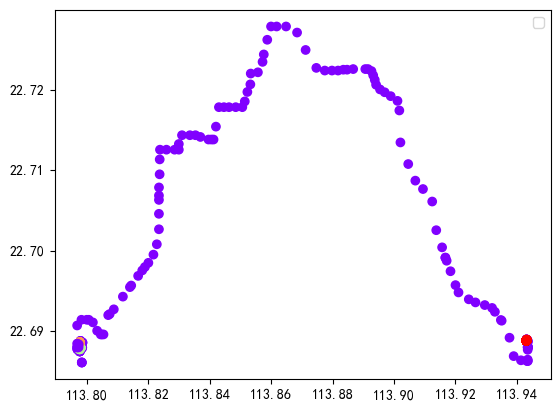

In [159]:
from sklearn.cluster import DBSCAN  
from sklearn.datasets import make_blobs  
import matplotlib.pyplot as plt
import sklearn.cluster as skc
  
# 生成一个随机数据集  
# X, y = make_blobs(n_samples=1000, centers=8, random_state=42)
  
# 创建DBSCAN聚类器  
dbscan = DBSCAN(eps=0.0001, min_samples=10).fit(point) #20*15/60=5分钟

# 进行聚类
labels = dbscan.labels_ #labels为每个数据的簇标签

# 可视化聚类结果
plt.scatter(point[:, 0], point[:, 1], c=labels, cmap='rainbow')
plt.legend()
plt.show()

In [160]:
data['labels']=labels
data

,定位时间,经度,纬度,labels
0,2024-07-29 10:02:28,113.797464,22.688276,0
1,2024-07-29 10:02:58,113.797464,22.688276,0
2,2024-07-29 10:03:28,113.797464,22.688276,0
3,2024-07-29 10:03:58,113.797464,22.688276,0
4,2024-07-29 10:04:28,113.797464,22.688276,0
...,...,...,...,...
8554,2024-08-01 15:28:50,113.943112,22.688810,4
8555,2024-08-01 15:29:20,113.943112,22.688810,4
8556,2024-08-01 15:29:50,113.943112,22.688810,4
8557,2024-08-01 15:30:20,113.943112,22.688810,4


In [161]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

5

In [162]:
data.groupby(data['labels']).count()

,定位时间,经度,纬度
labels,,,
-1,177,177,177
0,28,28,28
1,91,91,91
2,299,299,299
3,15,15,15
4,7949,7949,7949


In [163]:
# lei=5
# count=0 # 一个类的数量计数
# num=0
# for i in range(0,len(data)):
#     if(data['labels'][i]==0):
#         count=count+1
#         #仅针对最后一类数据做二级分类处理
#         if(i==len(data)-1):
#             num=num+1
#             if(num>1):
#                 for k in range(i-count,i):
#                     data['labels'][k]=lei
#                     lei=lei+1
#     else:
#         if(count!=0 and count<=11):#筛选出聚类结果当中时间小于5分钟的经纬度归为离散数据-1
#             for j in range(i-count,i):
#                 data['labels'][j]=-1
#         elif(count!=0 and count>11):#筛选出聚类结果当中时间超过5分钟的经纬度
#             num=num+1
#             if(num>1):#如果在聚类当中的时间段分离（即类中分段）则按时间规则将聚类结果进行二级分类
#                 for k in range(i-count,i):
#                     data['labels'][k]=lei
#                 lei=lei+1
#         count=0
# print(num)

In [164]:
#将不在时间范围内的数据标签改为默认值-1
def function_1(x,lei):
    count=0
    num=0
    for i in range(0,len(data)):
        if(data['labels'][i]==x):
            count=count+1
            #仅针对最后一类数据做二级分类处理
            if(i==len(data)-1):
                num=num+1
                if(num>1):
                    for k in range(i-count,i):
                        data['labels'][k]=lei
                        lei=lei+1
        else:
            if(count!=0 and count<=11):#筛选出聚类结果当中时间小于5分钟的经纬度归为离散数据-1
                for j in range(i-count,i):
                    data['labels'][j]=-1
            elif(count!=0 and count>11):#筛选出聚类结果当中时间超过5分钟的经纬度
                num=num+1
                if(num>1):#如果在聚类当中的时间段分离（即类中分段）则按时间规则将聚类结果进行二级分类
                    for k in range(i-count,i):
                        data['labels'][k]=lei
                    lei=lei+1
            count=0
    print(num)

In [165]:
function_1(0,5)
function_1(1,5)
function_1(2,5)
function_1(3,5)
function_1(4,5)

1
2
5
0
1


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13424\3859870029.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['labels'][j]=-1
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13424\3859870029.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['labels'][k]=lei


In [166]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

5

In [38]:
# num=0
# count=0
# for i in range(0,len(data)):
#     if(data['labels'][i]== 3):
#         count=count+1
# #         print(i)
#         if(i==len(data)-1):
#             print(count)
#             num=num+1
#     else:
#         if(count!=0):
#             print(count)
#             num=num+1
#         count=0
# #     num=num+1
# print(num)

In [167]:
data.groupby(data['labels']).count()

,定位时间,经度,纬度
labels,,,
-1,214,214,214
0,16,16,16
1,21,21,21
2,44,44,44
4,7947,7947,7947
5,212,212,212
6,24,24,24
7,55,55,55
8,26,26,26


In [40]:
data

,定位时间,经度,纬度,labels
0,2024-07-29 10:02:28,113.797464,22.688276,-1
1,2024-07-29 10:02:58,113.797464,22.688276,-1
2,2024-07-29 10:03:28,113.797464,22.688276,-1
3,2024-07-29 10:03:58,113.797464,22.688276,-1
4,2024-07-29 10:04:28,113.797464,22.688276,-1
...,...,...,...,...
8554,2024-08-01 15:28:50,113.943112,22.688810,7948
8555,2024-08-01 15:29:20,113.943112,22.688810,7949
8556,2024-08-01 15:29:50,113.943112,22.688810,7950
8557,2024-08-01 15:30:20,113.943112,22.688810,7951


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


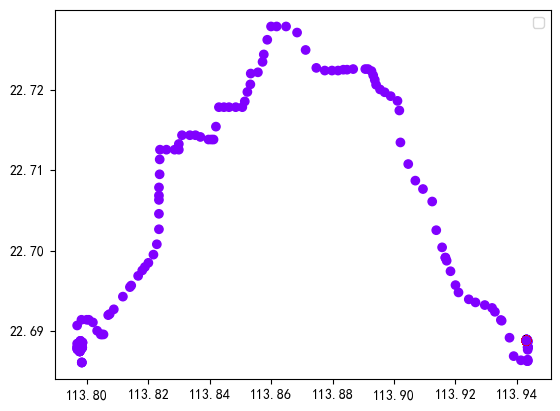

In [41]:
plt.scatter(point[:, 0], point[:, 1], c=data['labels'], cmap='rainbow')
plt.legend()
plt.show()

In [42]:
# 保存数据
# data.to_excel("D:/data/0280jvlei.xlsx",index=True,header=True)